In [9]:
import numpy as np 
import pandas as pd
import networkx as nx
import time 
from tqdm import tqdm
import operator 
import sys 
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import pickle as pk

test_data = pk.load(open('../../stroop_bulk_code/zordon_output/output/output_-0.0_100.pck', 'rb'))

In [26]:

good_ks = ['Serial', 'new pathway']
ks  = ['[[1], [0]]', '[[1], [0, 2]]']

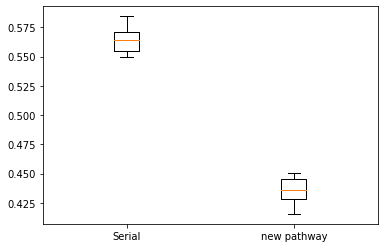

In [27]:
from collections import Counter, defaultdict

aggregated_performance = defaultdict(list)
for i, ts in test_data.items():
    count = Counter(ts)
    for x in ks:
        aggregated_performance[x].append(count[x]/len(ts))
    
plt.boxplot(aggregated_performance.values(), labels=good_ks);

In [28]:
import os 
files = os.listdir('../../stroop_bulk_code/zordon_output/output/')
files

['output_-0.5_20.pck',
 'output_-0.5_500.pck',
 'output_-0.5_100.pck',
 'output_-0.0_100.pck',
 'output_-0.0_500.pck',
 'output_-0.2_500.pck',
 'output_-0.2_20.pck',
 'output_-0.2_100.pck',
 'output_-0.0_20.pck']

# box plots 

In [37]:
discounts = [-0.0, -0.2, -0.5]
horizons = [20, 100, 500]

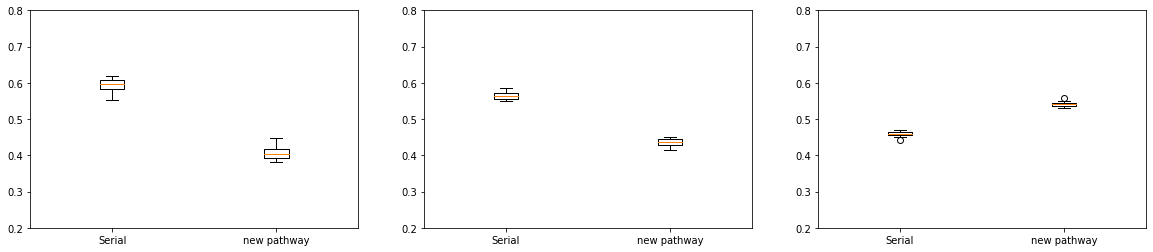

In [42]:
from collections import Counter, defaultdict
discount = discounts[0]

fig = plt.figure(figsize=(20,4))
for i, hor in enumerate(horizons):
    data = pk.load(open('../../stroop_bulk_code/zordon_output/output/output_'+str(discount)+'_'+str(hor)+'.pck', 'rb'))
    plt.subplot(1,3,i+1)
    aggregated_performance = defaultdict(list)
    for i, ts in data.items():
        count = Counter(ts)
        for x in ks:
            aggregated_performance[x].append(count[x]/len(ts))
    
    plt.boxplot(aggregated_performance.values(), labels=good_ks);
    plt.ylim(0.2,.8)

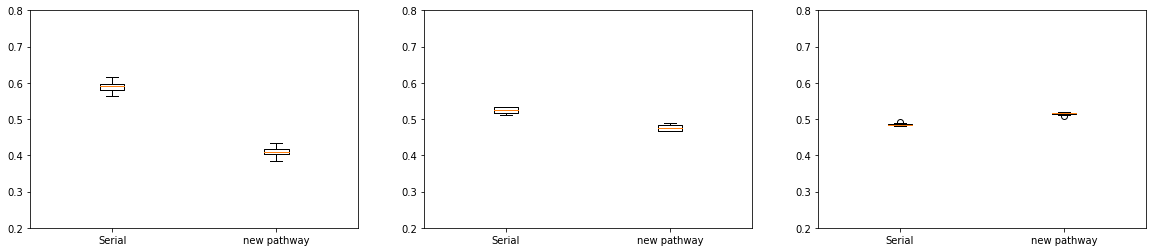

In [43]:
from collections import Counter, defaultdict
discount = discounts[1]

fig = plt.figure(figsize=(20,4))
for i, hor in enumerate(horizons):
    data = pk.load(open('../../stroop_bulk_code/zordon_output/output/output_'+str(discount)+'_'+str(hor)+'.pck', 'rb'))
    plt.subplot(1,3,i+1)
    aggregated_performance = defaultdict(list)
    for i, ts in data.items():
        count = Counter(ts)
        for x in ks:
            aggregated_performance[x].append(count[x]/len(ts))
    
    plt.boxplot(aggregated_performance.values(), labels=good_ks);
    plt.ylim(0.2,.8)

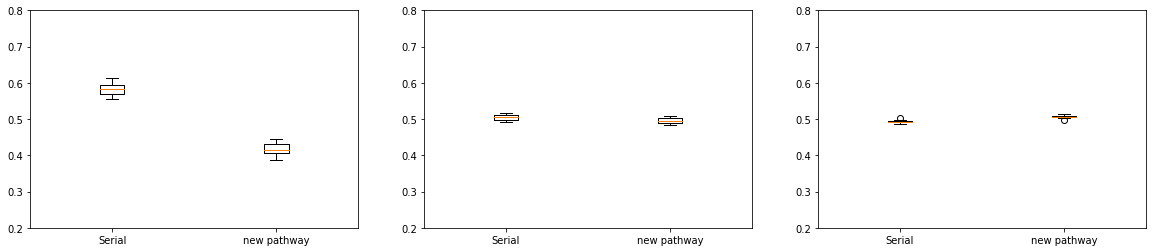

In [44]:
from collections import Counter, defaultdict
discount = discounts[2]

fig = plt.figure(figsize=(20,4))
for i, hor in enumerate(horizons):
    data = pk.load(open('../../stroop_bulk_code/zordon_output/output/output_'+str(discount)+'_'+str(hor)+'.pck', 'rb'))
    plt.subplot(1,3,i+1)
    aggregated_performance = defaultdict(list)
    for i, ts in data.items():
        count = Counter(ts)
        for x in ks:
            aggregated_performance[x].append(count[x]/len(ts))
    
    plt.boxplot(aggregated_performance.values(), labels=good_ks);
    plt.ylim(0.2,.8)

# pretty plots

In [92]:
label_redict = {ks[0]: 'Serial', ks[1]: 'Parallel'}
ls_dict = {ks[0]: 'dashed', ks[1]: 'solid'}
ms_dict = {ks[0]: 's', ks[1]: 'o'}
cs_dict = {ks[0]: 'k', ks[1]: 'gray'}

In [93]:
initial = [0.9, .1]

In [94]:
new_horizons = [0]


new_horizons.extend(horizons)


In [95]:
hml = ['High', 'Moderate', 'Low']

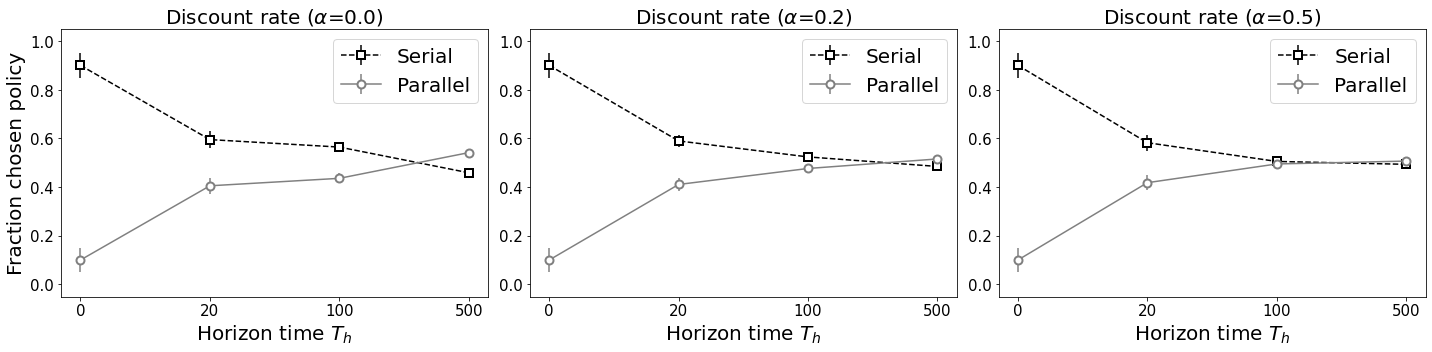

In [99]:
from collections import Counter, defaultdict

discount = discounts[0]

fig = plt.figure(figsize=(20, 5))


for dis, discount in enumerate(discounts):
    mu_frac = defaultdict(list)
    std_frac = defaultdict(list)
    for xx, x in enumerate(ks):
        mu_frac[x].append(initial[xx])
        std_frac[x].append(.05)
    for hor in horizons:
        data = pk.load(
            open(
                "../../stroop_bulk_code/zordon_output/output/output_"
                + str(discount)
                + "_"
                + str(hor)
                + ".pck",
                "rb",
            )
        )
        aggregated_performance = defaultdict(list)
        for key, ts in data.items():
            count = Counter(ts)
            for x in ks:
                aggregated_performance[x].append(count[x] / len(ts))
        for x in aggregated_performance:
            mu_frac[x].append(np.mean(aggregated_performance[x]))
            std_frac[x].append(2 * np.std(aggregated_performance[x]))

    plt.subplot(1, 3, dis + 1)
    for i, x in enumerate(mu_frac):
        plt.errorbar(
            range(len(horizons)+1),
            mu_frac[x],
            std_frac[x],
            label=label_redict[x],
            color=cs_dict[x],
            marker=ms_dict[x],
            mfc="white",
            mec=cs_dict[x],
            ls=ls_dict[x],
            ms=8,
            mew=2,
        )

    if dis == 0:
        plt.ylabel(r"Fraction chosen policy", fontsize=20)
    plt.legend(fontsize=20)
    plt.xticks(range(len(horizons)+1), new_horizons, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.05, 1.05)
    plt.title(r'Discount rate ($\alpha$=' + str(-discount) +')', fontsize=20)
    plt.xlabel(r"Horizon time $T_h$", fontsize=20)
plt.tight_layout()
plt.savefig('../../reboot_formal_cost_manuscript/plots/new-figures/discount-factor-results-new-rough.pdf')

In [97]:
new_horizons

[0, 20, 100, 500]